In [1]:
#from Week_4 import G #somehow does not work :( #Worked fine for me - Oliver
import networkx as nx
G = nx.read_gpickle("css_graph.gpickle")

In [2]:
import netwulf as nw
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors
import math

# Part 2 : Visualizing the network of Computational Social Scientists

### Exercise 1: Visualize the network of Computational Social scientists.

In [3]:
G_lcc = max(nx.connected_components(G), key=len)

# create a subgraph of the largest connected component
G_lcc = G.subgraph(G_lcc)
# convert G_lcc to a Graph object
G = nx.Graph(G_lcc)

#nw.visualize(G_lcc) #visualize largest conneccted componenents
#nw.visualize(G) #visualize whole css graph

###### Visualization with differently coloured nodes according to top_field

In [4]:
# get the values of the "a" attribute for all nodes in G
top_fields = nx.get_node_attributes(G, "top_field").values()
# get the unique values of the "a" attribute
unique_top_fields = set(top_fields)
# print the unique values of the "a" attribute
#print(unique_top_fields)

# create a list of colors
colors = mcolors.CSS4_COLORS
colors = [i for i in colors if i != "black"] #remove black

# create a dictionary that maps each string to a color using a dictionary comprehension
color_map = {string: color for string, color in zip(unique_top_fields, colors)}
color_map[None] = "black"

#color_map = {"Computer Science": "red", "Economics": "green", "Medicine": "blue", "Mathematics": "yellow", "Business": "black", None: "gray"}  # Default color for nodes without attribute

for node in G.nodes():
    attribute_value = G.nodes[node].get('top_field', None)  # Access the attribute value, or None if it doesn't exist
    color = color_map[attribute_value]  # Map the attribute value to a color
    G.nodes[node]['color'] = color  # Assign the color to the node

In [5]:
#Choose which one to visualize

#nw.visualize(G)
#nw.visualize(G_lcc)

In [6]:
#color_map

In [7]:
#get counts of different colors in G_lcc
from collections import Counter

# get the color attribute values as a list
color_values = [tuple(G_lcc.nodes[n]['color']) for n in G_lcc.nodes if 'color' in G_lcc.nodes[n]]

# count the number of occurrences of each value
color_counts = Counter(color_values)
print(color_counts)

Counter()


In [8]:
#get counts of different top fields in G_lcc
from collections import Counter
# get the color attribute values as a list
color_values = [G_lcc.nodes[n]['top_field'] for n in G_lcc.nodes if 'top_field' in G_lcc.nodes[n]]

# count the number of occurrences of each value
color_counts = Counter(color_values)

print(color_counts)

Counter({'Computer Science': 829, 'Economics': 281, 'Medicine': 97, 'Psychology': 79, 'Political Science': 78, 'Sociology': 50, 'Business': 42, 'Physics': 30, 'Biology': 26, 'Education': 20, 'Environmental Science': 18, 'Mathematics': 14, 'Art': 11, 'Engineering': 7, 'Materials Science': 6, 'Law': 5, 'Linguistics': 4, 'Philosophy': 4, 'History': 2, 'Agricultural And Food Sciences': 2})


# Part 3: Properties of the real-world network of Computational Social Scientists

### Exercise 2

##### 2.1 Random Network: In this exercise we will create a Random Network as a "null model" to investigate some properties of the Computational Social Scientists Network.

In [9]:
L = G.number_of_edges()
N = G.number_of_nodes()
p = L/(N*(N-1)/2)
print('L =' + str(L) + ', N = ' + str(N) + ', p = ' + str(p))
      
G_random = nx.fast_gnp_random_graph(N, p)

L =10921, N = 5045, p = 0.0008583336804603139


In [10]:
nw.visualize(G_random) #visualize graph

(None, None)

Comparison between real and random network: In the random network each node is equally likely to be connected to any other node. Thus there is no clear clustering as can be observed in the real dataset. This is because the random graph formation does not capture the phenomenon of researchers working together with researchers that some of their peers already know. Research collaborations also often involve more than just two researchers and thus clusters are formed as can be seen in the real (non-random) network. Overall, this also means that the visualizing the graph is not as intuitive as there are edges all over the place.

##### 2.2 Degree Distribution: In this exercise, we will compare the degree distribution of the real network and its random counterpart.

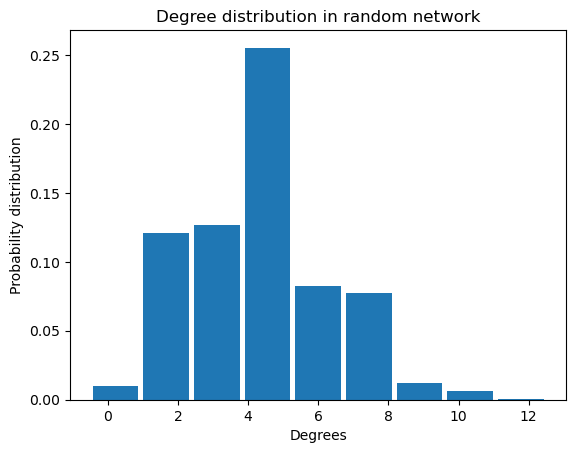

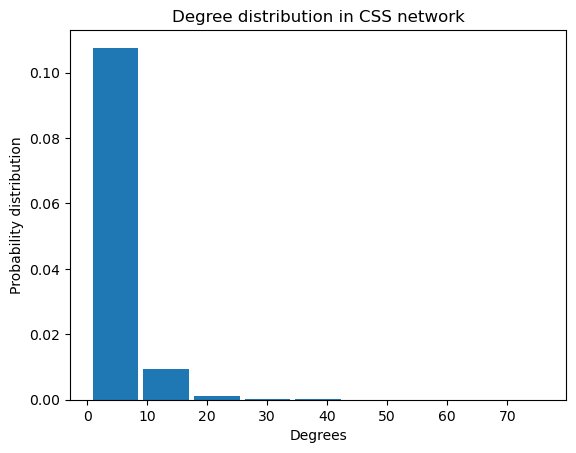

In [12]:
def plot_hist(X, x_log, y_log, bar_hist, title):
    # Create histogram
    bins = np.linspace(math.floor(min(X))-0.5, math.ceil(max(X))-0.5, 10) # creates bins
    if x_log:
        bins = np.logspace(0, np.log10(math.ceil(max(X))), math.ceil(max(X)))
    hist, edges = np.histogram(X, bins = bins, density = True) #change density to false if you want y = count (instead of probability distribution))
    x = (edges[1:]+edges[:-1])/2
    width = bins[1]-bins[0]

    fig, ax = plt.subplots()
    if bar_hist:
        barplot = ax.bar(x, hist, width = width *0.9, label='Probability distribution')
    else:
        ax.plot(x, hist, marker = '.')

    ax.set_xlabel('Degrees')
    ax.set_ylabel('Probability distribution')
    if x_log:
        ax.set_xscale('log')
    if y_log:
        ax.set_yscale('log')
    plt.title(title)
        
degrees_random = list(dict(nx.degree(G_random)).values())
degrees_css = list(dict(nx.degree(G)).values())

plot_hist(degrees_random, x_log = False, y_log = False, bar_hist = True, title = 'Degree distribution in random network')
plot_hist(degrees_css, x_log = False, y_log = False, bar_hist = True, title = 'Degree distribution in CSS network')

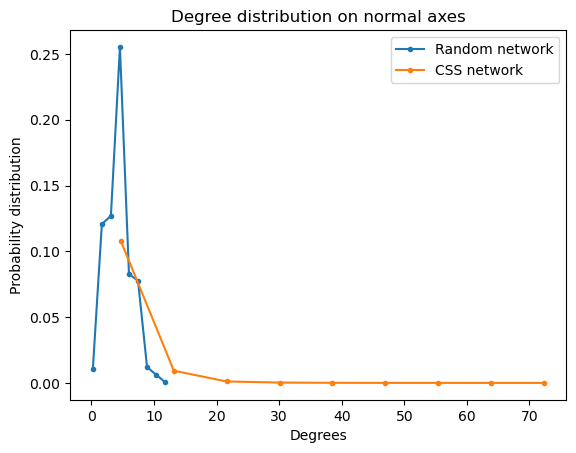

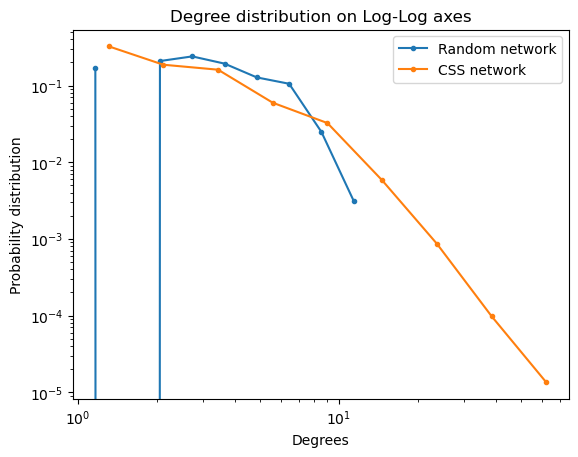

In [13]:
def plot_linegraph(X, x_log, y_log, n_bins):
    # Create histogram
    bins = np.linspace(math.floor(min(X))-0.5, math.ceil(max(X))-0.5, n_bins) # creates bins
    if x_log:
        bins = np.logspace(0, np.log10(math.ceil(max(X))), n_bins)
    hist, edges = np.histogram(X, bins = bins, density = True) #change density to false if you want y = count (instead of probability distribution))
    x = (edges[1:]+edges[:-1])/2
    width = bins[1]-bins[0]

    ax.plot(x, hist, marker = '.')
    
    ax.set_xlabel('Degrees')
    ax.set_ylabel('Probability distribution')
    if x_log:
        ax.set_xscale('log')
    if y_log:
        ax.set_yscale('log')

    
fig, ax = plt.subplots()
plot_linegraph(degrees_random, x_log = False, y_log = False, n_bins = 10)
plot_linegraph(degrees_css, x_log = False, y_log = False, n_bins = 10)
plt.title('Degree distribution on normal axes')
plt.legend(['Random network', 'CSS network'])


fig, ax = plt.subplots()
plot_linegraph(degrees_random, x_log = True, y_log = True, n_bins = 10)
plot_linegraph(degrees_css, x_log = True, y_log = True, n_bins = 10)
plt.title('Degree distribution on Log-Log axes')
plt.legend(['Random network', 'CSS network'])


The median degree in both graphs is 3. The mean degree is also similar with 3.4 and 3.2 for the css and random graph, respectively. This was to be expected as we initialized the random graph to have the same amount of expected edges. However, in the real css network some nodes have an extremely high degree. The maximum is 26. The random network cannot capture this as it's maximum degrees in this case is 9 (may vary depending on random initiation, but in any case significantly lower). This does not per se affect the visualizations if the bins had been selected equally. However, in both cases only 10 bins are selected. In the case of the real network this leads to larger bin sizes and thus a completely different visualization. The bar plots seem to describe two very different distributions. However, when plotting on a log-log line plot, the two distributions seem very similar. Furthermore, the different maximum degreed suggest that the two graphs have different patterns of degree sequence. This can have implications for other structural properties of the graph.

Below a few satistics of the two graphs can be seen. The median is the same for the css and random graph. The mean degree is also approximately the same and varies slightly depending on how the random graph was initialized. As mentioned, this was to be expected as we initialized the random graph to have the same amount of expected edges.

In [14]:
print(np.median(degrees_css))
print(np.median(degrees_random))
print()
print(np.mean(degrees_css))
print(np.mean(degrees_random))
print(np.mean(degrees_css) / np.mean(degrees_random))
print()
print(max(degrees_css))
print(max(degrees_random))
print()
print(degrees_css.count(0))
print(degrees_random.count(0))

3.0
4.0

4.329435084241823
4.295341922695738
1.0079372404245501

77
13

0
75


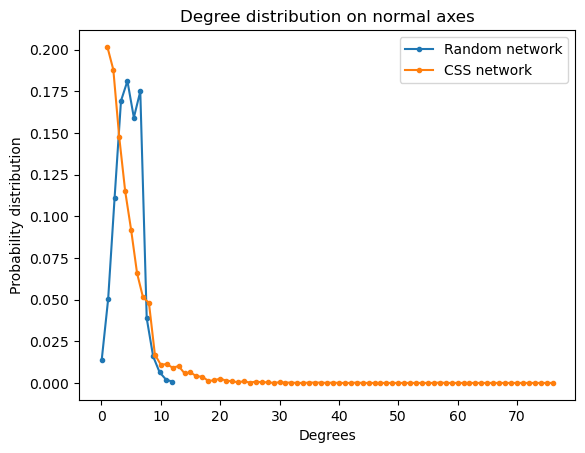

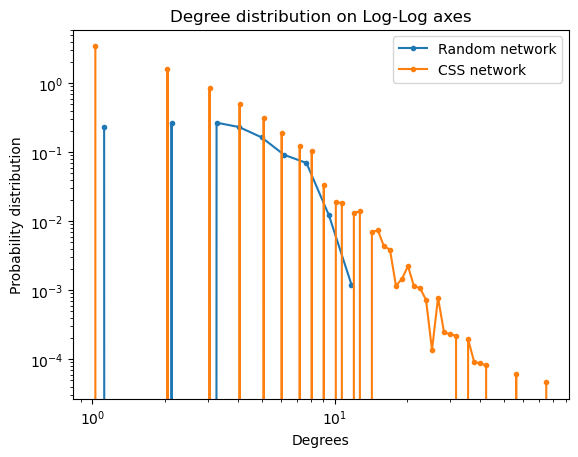

In [15]:
#Plot with equally spaced bins:

fig, ax = plt.subplots()
plot_linegraph(degrees_random, x_log = False, y_log = False, n_bins = max(degrees_random))
plot_linegraph(degrees_css, x_log = False, y_log = False, n_bins = max(degrees_css))
plt.title('Degree distribution on normal axes')
plt.legend(['Random network', 'CSS network'])


fig, ax = plt.subplots()
plot_linegraph(degrees_random, x_log = True, y_log = True, n_bins = max(degrees_random))
plot_linegraph(degrees_css, x_log = True, y_log = True, n_bins = max(degrees_css))
plt.title('Degree distribution on Log-Log axes')
plt.legend(['Random network', 'CSS network'])

##### 2.3 Shortest Paths: Here, we will check if the Computational Social Scientists Network is a small-world Network.

In [16]:
G_lcc_random = max(nx.connected_components(G_random), key=len)
# create a subgraph of the largest connected component
G_lcc_random = G_random.subgraph(G_lcc_random)
# convert G_lcc to a Graph object
G_lcc_random = nx.Graph(G_lcc_random)

#nw.visualize(G_lcc_random)

In [17]:
# compute the average shortest path length
avg_shortest_path = nx.average_shortest_path_length(G_lcc)
avg_shortest_path_random = nx.average_shortest_path_length(G_lcc_random)
print(avg_shortest_path)
print(avg_shortest_path_random)

print(G_lcc.number_of_nodes())
print(G_lcc_random.number_of_nodes())

print(np.log(G_lcc.number_of_nodes()))
print(np.log(G_lcc_random.number_of_nodes()))

8.378573314796142
6.008400567970964
2769
4966
7.926241523170962
8.510369966068112


The largest conected components from the css network is significantly smaller than the one from the random network. Accordingly, the average shortest path is also larger. The average shortest path in random networks should grow according to ln(N), which can be in parts observed here. For the css network, the small-world property holds, as the average shortest path is almost equal to ln(N).

##### 2.4 Clustering: Here, we will compare the clustering coefficient in the Computational Social Scientists Network and its random counterpart.

In [18]:
import itertools
def clustering_coeff_formula(G):
    clustering_coeff = {}
    for node in G.nodes():
        ki = len(list(G.neighbors(node)))
        Li = 0
        for neighbor1 in G.neighbors(node):
            for neighbor2 in G.neighbors(node):
                if G.has_edge(neighbor1, neighbor2):
                    Li += 1/2 #divided by two as each edge is counted twice otherwise
        if ki > 1:
            clustering_coeff[node] = 2 * Li / (ki * (ki - 1))
        else:
            clustering_coeff[node] = 0
    return clustering_coeff

# print the clustering coefficient for each node
#for node in G_random.nodes():
#    print("Node", node, "has clustering coefficient", clustering_coeffs[node])
print(sum(clustering_coeff_formula(G_random).values()) / len(clustering_coeff_formula(G_random))) #mean

0.0009666965563893214


In [19]:
clustering_coeffs_networkX = nx.clustering(G_random)
print(sum(clustering_coeffs_networkX.values()) / len(clustering_coeffs_networkX)) #mean
print('p = ' + str(p))

0.0009666965563893214
p = 0.0008583336804603139


The probability of two nodes being connected in case that they are connected to at least one equal node is approx. 2%. The result is the same when using the formula or the built-in function of networkX.

Given that the network is completely random C = p (ideally, i.e. for N -> infinity). This is approximately true in our case. When we create a random network with higher number of nodes we get closer to C=p (see below)

In [20]:
print ('changing from N = ' + str(G.number_of_nodes()) + ' to N = 10000 yields p ≈ C =')
N=10000
G_random2 = nx.fast_gnp_random_graph(N, p)
clustering_coeffs_networkX2 = nx.clustering(G_random2)
print(sum(clustering_coeffs_networkX2.values()) / len(clustering_coeffs_networkX2)) #mean

changing from N = 5045 to N = 10000 yields p ≈ C =
0.0007066420017890603


In [21]:
#Clustering coefficients of our CSS network:
print(sum(clustering_coeff_formula(G).values()) / len(clustering_coeff_formula(G))) #mean with formula
print(sum(nx.clustering(G).values()) / len(nx.clustering(G))) #mean with NetworkX function

0.6661335658657657
0.6661335658657657


The clustering coefficient of our CSS network is significantly higher than the one of the random network. This makes sense as we are only considering authors that have collaborated with other authors (?). Most of our nodes exist in clusters.

As stated in the book: "In summary, we find that the random network model does not capture the clustering of real networks. Instead real networks have a much higher clustering coefficient than expected for a random network of similar N and L."